In [ ]:
# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
import cv2
from tensorflow.keras.utils import load_img,img_to_array

In [ ]:
# Loading dataset

In [15]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test',
                                                            shuffle=True,
                                                            image_size=(64,64),
                                                            batch_size=32)


Found 22 files belonging to 2 classes.


In [16]:
classes=dataset.class_names
classes


['Defective', 'Non defective']

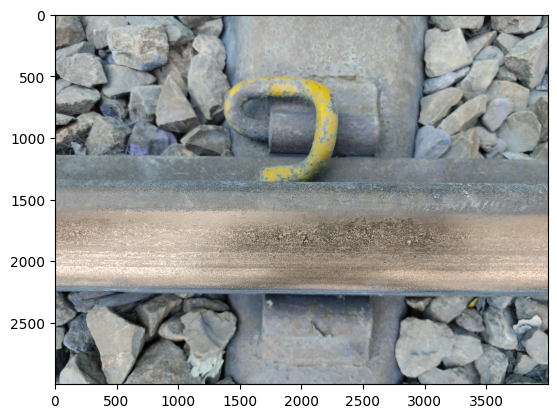

In [17]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Defective/IMG_20201114_100209.jpg'))

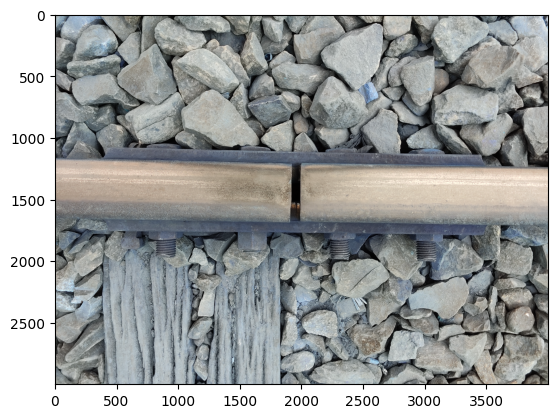

In [18]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Non defective/IMG_20201114_100344.jpg'))

In [19]:
datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           validation_split=0.2)
training_set=datagen.flow_from_directory('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Train',
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode='binary',
                                         subset='training')

Found 240 images belonging to 2 classes.


In [20]:
validation_set=datagen.flow_from_directory('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test',
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode='binary',
                                         subset='validation')

Found 4 images belonging to 2 classes.


In [8]:
# Convolutional Neural Network
model=Sequential()
#Input layer
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# first layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
training_data=model.fit(x=training_set,validation_data=validation_set,epochs=30)
training_data

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 174s 13s/step - accuracy: 0.6944 - loss: 0.5161 - val_accuracy: 1.0000 - val_loss: 0.0358
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9833 - loss: 0.0552 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9906 - loss: 0.0366 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9907 - loss: 0.0327 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9994 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 2.1680e-04
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.9944 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy

In [11]:
hist=training_data.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [12]:
hist['val_accuracy'][-1]

1.0

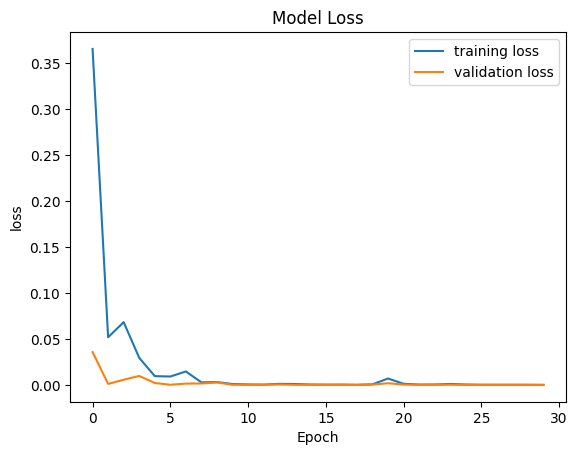

In [13]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

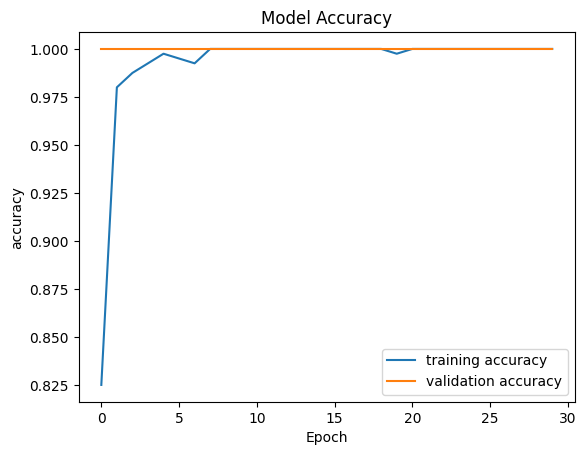

In [14]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
class {'Defective': 0, 'Non Defective': 1}
non-defective


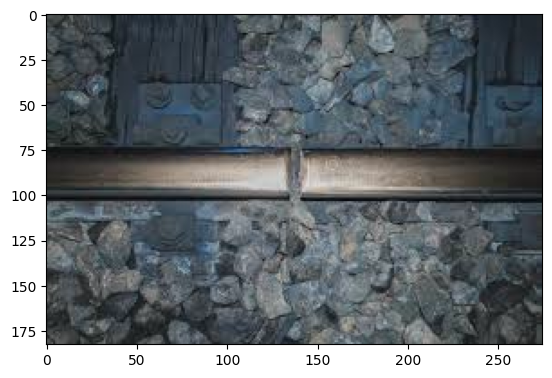

In [ ]:
test_image=load_img('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Defective/IMG_20201114_101124.jpg',target_size=(64,64))
plt.imshow(cv2.imread('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Defective/IMG_20201114_101124.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
result=model.predict(test_image_array)
print('class',training_set.class_indices)
if result[0][0]==1:
  prediction='defective'
else:
  prediction='non-defective'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
class {'Defective': 0, 'Non Defective': 1}
defective


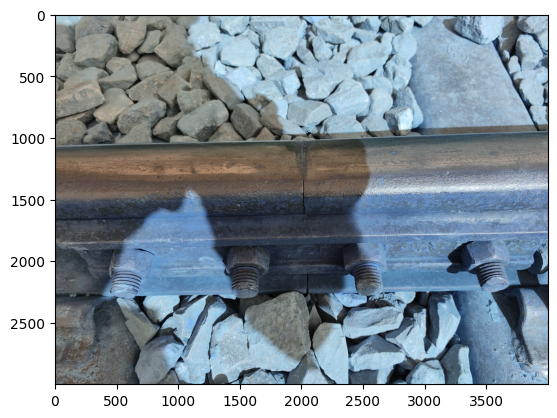

In [ ]:
test_image=load_img('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Non defective/IMG_20201114_100358.jpg',target_size=(64,64))
plt.imshow(cv2.imread('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Non defective/IMG_20201114_100358.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
result=model.predict(test_image_array)
print('class',training_set.class_indices)
if result[0][0]==1:
  prediction='defective'
else:
  prediction='non-defective'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
class {'Defective': 0, 'Non Defective': 1}
non-defective


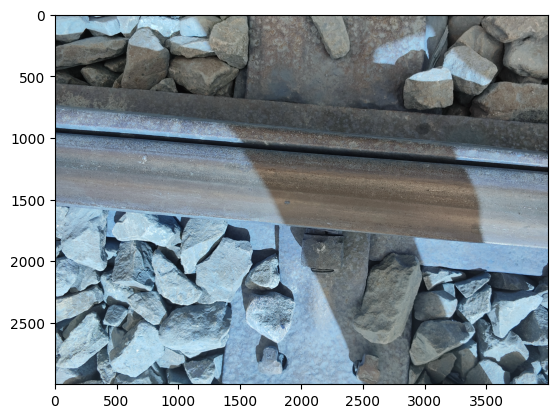

In [ ]:
test_image=load_img('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Non defective/IMG_20201114_100023.jpg',target_size=(64,64))
plt.imshow(cv2.imread('/content/drive/MyDrive/Deep_learning_futura/Railway Track fault Detection/Test/Non defective/IMG_20201114_100023.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
result=model.predict(test_image_array)
print('class',training_set.class_indices)
if result[0][0]==1:
  prediction='defective'
else:
  prediction='non-defective'
print(prediction)

In [ ]:
# This study was conducted to propose a deep learningbased method to detect faults in railway tracks automatically.
#They collected images of railway tracks in Bangladesh to create their own dataset.
#This approach aims to reduce the need for costly and time-consuming manual inspections, helping
# to prevent railway accidents.